<img src = "images/ADS.jpg" align=left width=200/>




## 2.0 Introduction to Pandas and Exploratory Data Analysis

### Steps

1. **Preliminaries:**  Load libraries and set styles
2. **Load Data:**  Load and verify data
3. **Quick Hits:**  Answer some initial questions quickly
4. **Visualizations:**  Plot and examine distributions using matplotlib and seaborn
5. **Insight & Discovery:**  Are there further patterns in the data?

### 1. Preliminaries

In [2]:
# load libraries and set styles, options
import warnings; warnings.simplefilter('ignore')


import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

from ipywidgets import interact

In [2]:
# inline plots
%matplotlib inline

### 2. Read and verify data

In [3]:
# read csv dataset and load into pandas dataframe object "lexp"
lexp = pd.read_csv('data/lexpectancy.csv')

In [4]:
# check first few lines
lexp.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
3,Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
4,Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [5]:
# verify data frame shape
lexp.shape

(248, 56)

In [6]:
# review dataframe info
lexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 56 columns):
Country    248 non-null object
Code       248 non-null object
1960       222 non-null float64
1961       223 non-null float64
1962       223 non-null float64
1963       222 non-null float64
1964       222 non-null float64
1965       223 non-null float64
1966       223 non-null float64
1967       223 non-null float64
1968       223 non-null float64
1969       223 non-null float64
1970       224 non-null float64
1971       223 non-null float64
1972       223 non-null float64
1973       224 non-null float64
1974       223 non-null float64
1975       223 non-null float64
1976       223 non-null float64
1977       223 non-null float64
1978       225 non-null float64
1979       224 non-null float64
1980       225 non-null float64
1981       225 non-null float64
1982       229 non-null float64
1983       226 non-null float64
1984       226 non-null float64
1985       226 non-null float64
1

In [7]:
# set dataframe row index to country
lexp = lexp.set_index('Country')

In [8]:
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


### 3. Initial EDA

**Q. Did life expectancy increase from 1960 to 2013? **

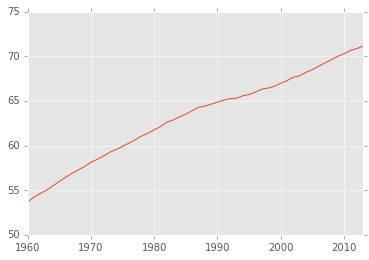

In [9]:
lexp.mean().plot()

**Q. Which countries had the highest and lowest life expectancy in 1960?**

In [10]:
# idxmax and idxmin provide the indices corresponding to max and min values in a column
print(lexp['1960'].idxmax())
print(lexp['1960'].idxmin())

Norway
Mali


**Q. What were the highest, lowest and mean values in 1960?**

In [11]:
# max and min provide the values
print(np.round(lexp['1960'].max()))
print(np.round(lexp['1960'].min()))
print(np.round(lexp['1960'].mean()))

74.0
28.0
54.0


**Q. What were the highest,lowest and mean values for arbitrary year? **

In [12]:
# define function to display high, low, mean for a year
def high_low_mean(year):
    print("In year", year)
    print(lexp[year].idxmin(), "had the lowest LE rate of:", np.round(lexp[year].min()))
    print(lexp[year].idxmax(), "had the highest LE rate of:", np.round(lexp[year].max()))
    print("The mean LE rate was: ", np.round(lexp[year].mean()))

In [13]:
high_low_mean('2010')

In year 2010
Lesotho had the lowest LE rate of: 47.0
San Marino had the highest LE rate of: 83.0
The mean LE rate was:  70.0


**Q. Which countries had the highest and lowest gains in life expectancy?**

In [14]:
# calculate gain and attach to new column; gain = (value_in_2013 - value_in_1960)/value_in_1960
lexp['gain'] = np.round((lexp['2013']-lexp['1960'])/lexp['1960'],2)

In [15]:
# verify dataframe
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,gain
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,0.15
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,0.86
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,0.57
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244,0.25


In [16]:
# create pandas series object with only the gain column 
gain = lexp['gain']

In [17]:
# verify object type of gain
type(gain)

pandas.core.series.Series

In [18]:
gain.head()

Country
Aruba          0.15
Andorra         NaN
Afghanistan    0.86
Angola         0.57
Albania        0.25
Name: gain, dtype: float64

In [19]:
# drop missing values and order the series
lexp_gain = gain.dropna().order(ascending=False)

In [20]:
lexp_gain.head()

Country
Bhutan         1.14
Maldives       1.06
Mali           1.04
Timor-Leste    1.00
Nepal          0.97
Name: gain, dtype: float64

In [21]:
# ten countries with the most gain
lexp_gain.head(10)

Country
Bhutan         1.14
Maldives       1.06
Mali           1.04
Timor-Leste    1.00
Nepal          0.97
Gambia, The    0.87
Afghanistan    0.86
Yemen, Rep.    0.85
Oman           0.80
Tunisia        0.75
Name: gain, dtype: float64

In [22]:
# ten countries with the least gain
lexp_gain.tail(10)

Country
Guyana                0.10
Slovak Republic       0.09
Zimbabwe              0.08
Russian Federation    0.08
Bulgaria              0.08
Belarus               0.07
Lesotho               0.06
Lithuania             0.06
Latvia                0.06
Ukraine               0.04
Name: gain, dtype: float64

In [23]:
# delete gain column from lexp dataframe since it is now available in lexp_gain 
del lexp['gain']

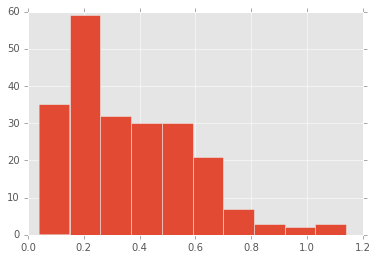

In [24]:
# histogram of gains
lexp_gain.hist()

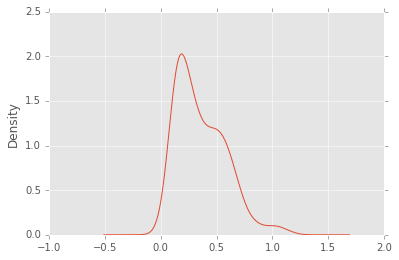

In [25]:
# kde plot of gains
lexp_gain.plot(kind='kde')

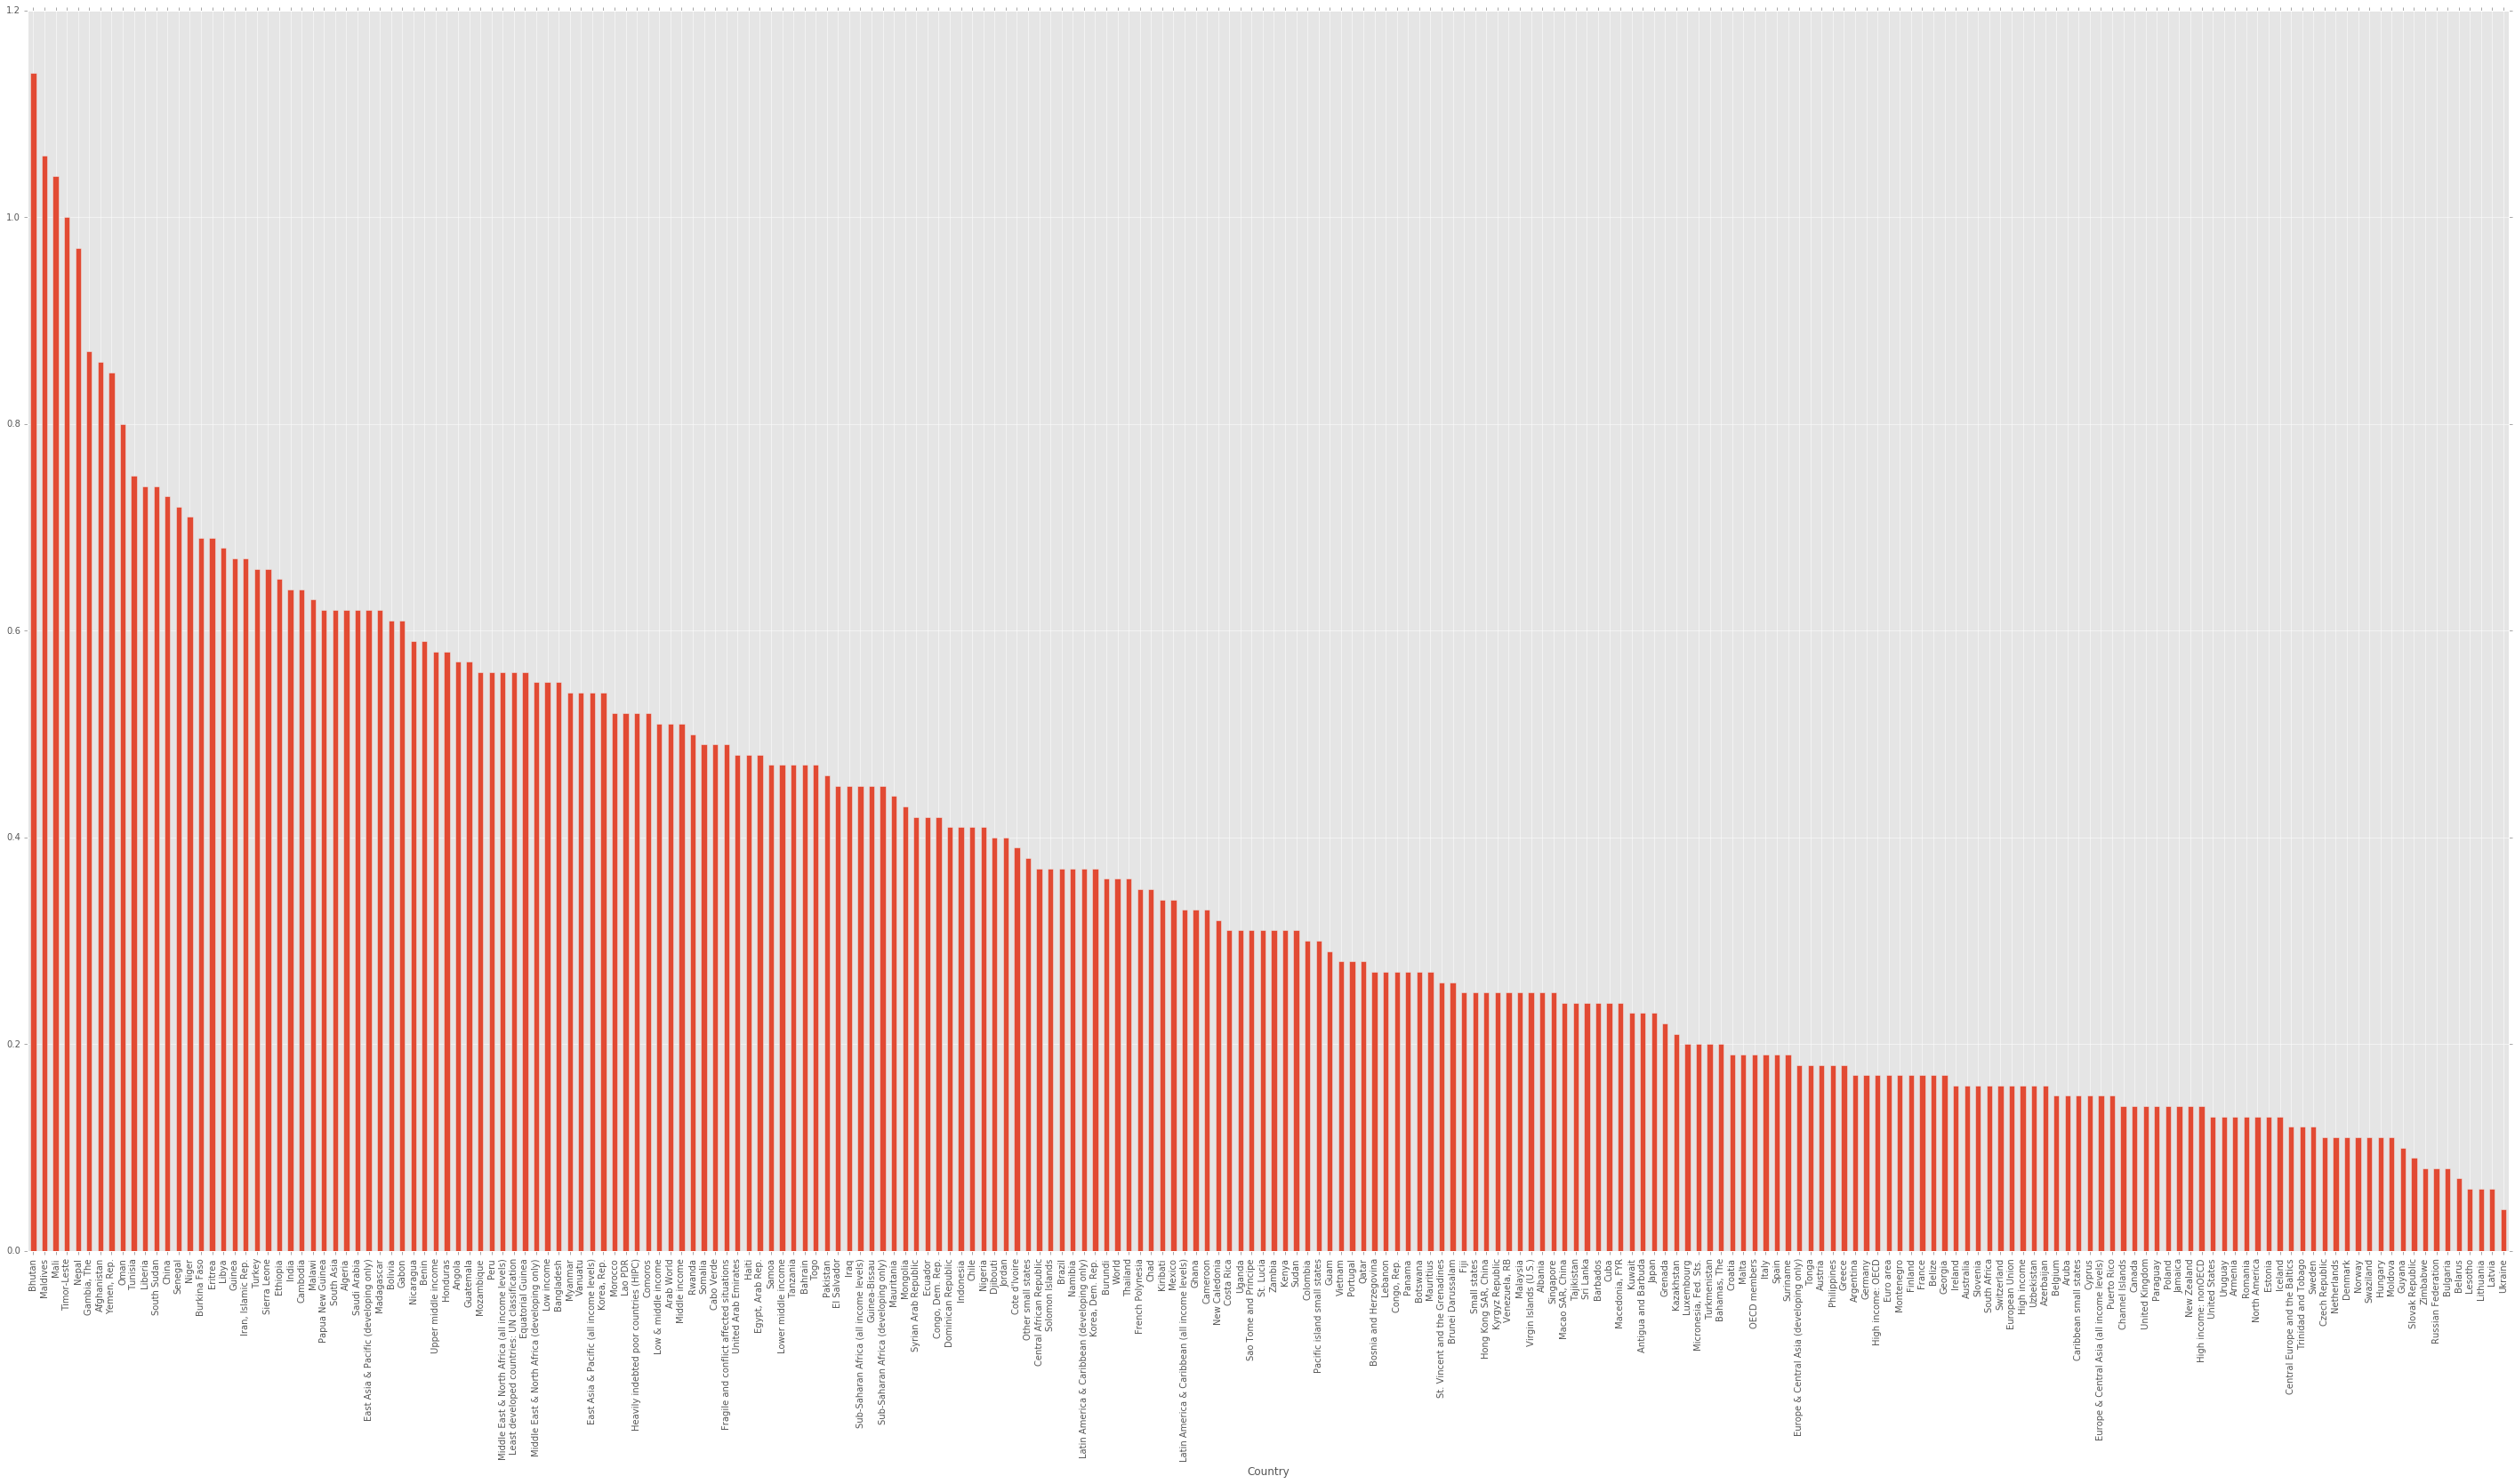

In [26]:
# bar graph of gains and save it to a file
ax = lexp_gain.plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

## 4. Plots of various distributions

### Histograms

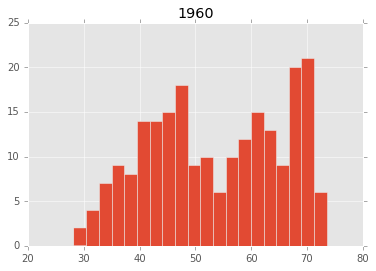

In [27]:
# histogram of LE for a particular year using standard matplotlib and pandas
lexp.hist(column='1960', bins=20);

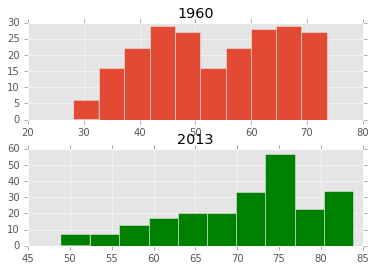

In [28]:
# compare distributions for years 1960 and 2013 in subplots
f, (ax1, ax2) = plt.subplots(2);
lexp.hist(column='1960', ax=ax1);
lexp.hist(column='2013', color='green', ax=ax2);

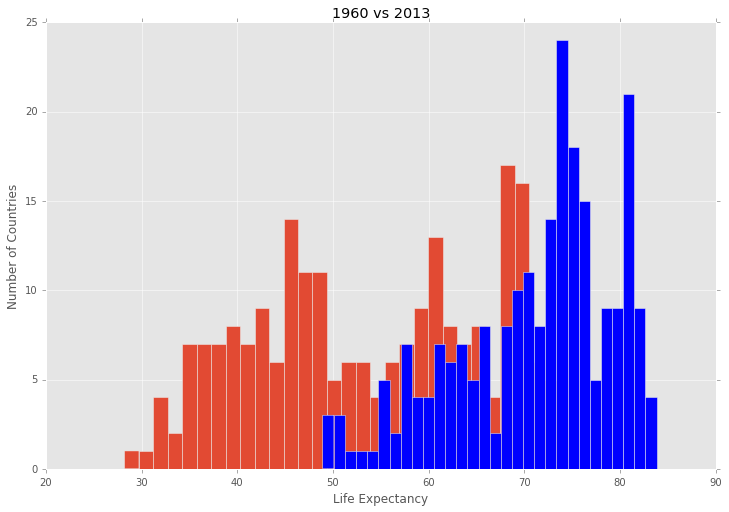

In [29]:
# compare two years in same frame
f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
lexp.hist(column='1960',bins=30, ax=ax1);
lexp.hist(column='2013',bins=30, color='blue', ax=ax1);
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Countries')
plt.title("1960 vs 2013")

In [30]:
# define function to compare two years in same frame
def compare_hist(year1,year2):
    f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    lexp.hist(column=year1,bins=20, ax=ax1);
    lexp.hist(column=year2,bins=20, color='blue', ax=ax1);
    plt.xlabel('Life Expectancy')
    plt.ylabel('Number of Countries')
    plt.title(str(year1) + " vs " + str(year2))

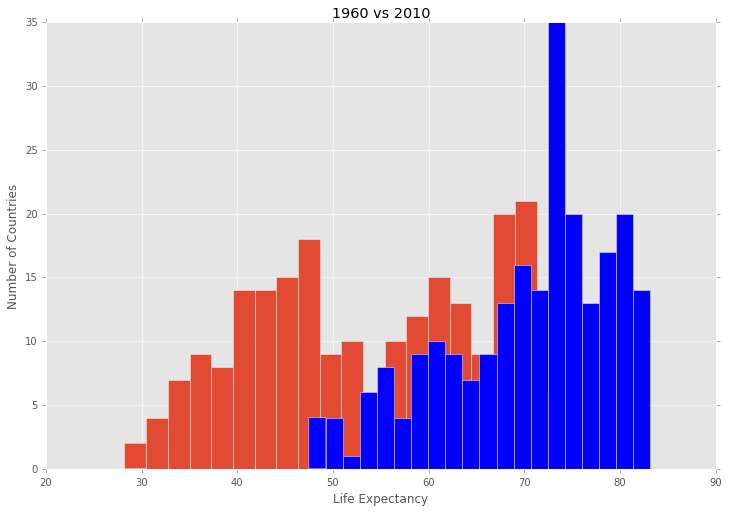

In [31]:
compare_hist('1960','2010')

#### Create interactive widget to compare decades

In [32]:
# use list comprehension to to extract decades
years = [str(year) for year in range(1960,2014) if year%10==0]

In [33]:
years

['1960', '1970', '1980', '1990', '2000', '2010']

In [34]:
interact(compare_hist, year1=years,year2=years);

A Jupyter Widget

### Kernel Density Estimate (KDE) and Rugplot

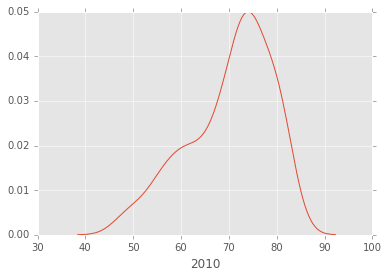

In [35]:
# use seaborn visualization library to plot distributions
# parameters for histogram, kde, and rug can be set true or false

sns.distplot(lexp['2010'].dropna(), hist=False, kde=True, rug=False, bins=25);

In [36]:
def sns_compare(year1,year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    for yr in range(int(year1),int(year2)):
        sns.distplot(lexp[str(yr)].dropna(), hist=False, kde=True, rug=False, bins=25)

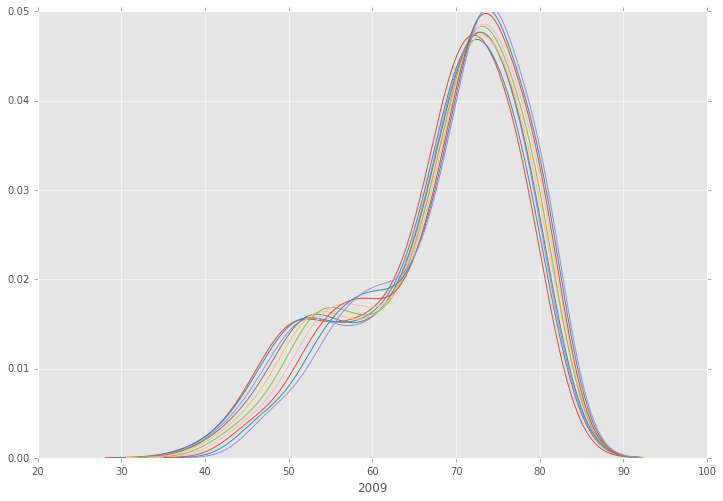

In [37]:
sns_compare('2000','2010')

In [38]:
# create interactive widget
interact(sns_compare, year1=years,year2=years);

A Jupyter Widget

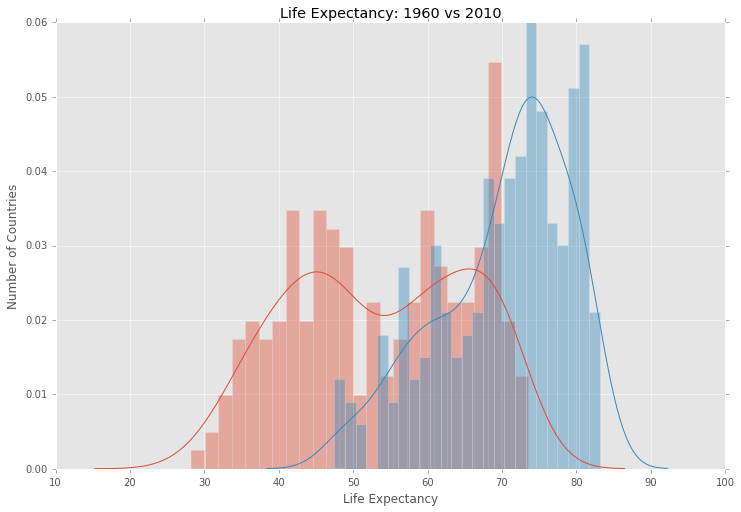

In [39]:
# side by side comparison
f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
sns.distplot(lexp['1960'].dropna(),hist=True, kde=True, rug=False, bins=25);
sns.distplot(lexp['2010'].dropna(),hist=True, kde=True, rug=False, bins=25);
plt.xlabel('Life Expectancy');
plt.ylabel('Number of Countries');
plt.title('Life Expectancy: 1960 vs 2010')

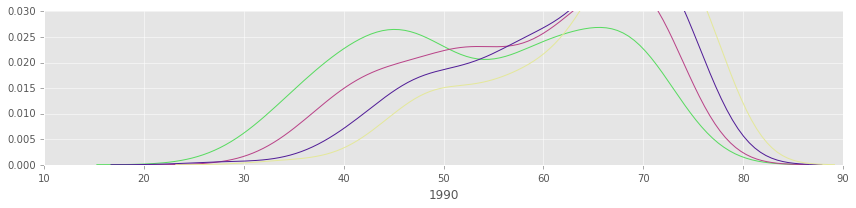

In [40]:
# facetgrid version kdeplot by decade
fig = sns.FacetGrid(lexp,aspect=4)
decades = [str(year) for year in range(1960,2000) if year%10==0]
for year in decades:
    fig.map(sns.kdeplot, year, color=np.random.rand(3,1))

#### Boxplot

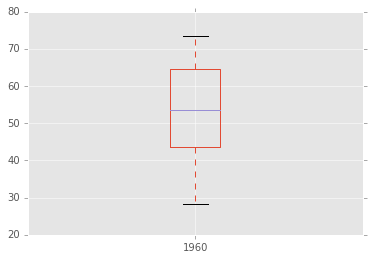

In [41]:
# boxplot using standard pandas and matplotlib
lexp.boxplot(column='1960');

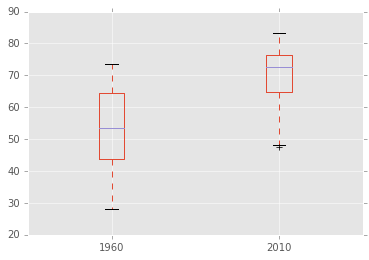

In [42]:
lexp.boxplot(column=['1960','2010']);

In [43]:
def boxplot_compare(year1,year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    lexp.boxplot(column=[year1,year2]);

In [44]:
interact(boxplot_compare, year1=years,year2=years);

A Jupyter Widget

#### Violinplot

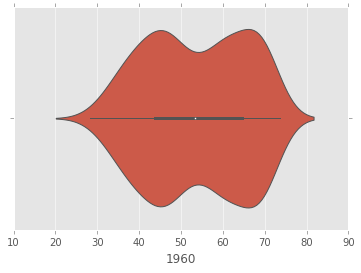

In [45]:
sns.violinplot(lexp['1960'])

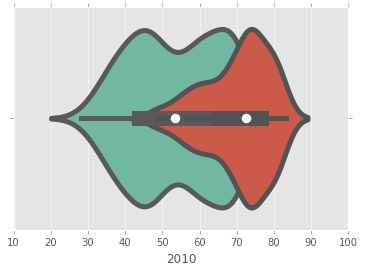

In [46]:
sns.violinplot(lexp['1960'], palette="Set2",linewidth=5)
sns.violinplot(lexp['2010'],linewidth=5)

In [47]:
def violin_compare(year1, year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    sns.violinplot(lexp[year1], palette="Set2")
    sns.violinplot(lexp[year2])
    

In [48]:
interact(violin_compare, year1=years,year2=years);

A Jupyter Widget

## 5. Insight and Discovery

In [49]:
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [50]:
# transform the lexp dataframe 
transform = lexp.T

In [51]:
transform.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293


In [52]:
# drop the country code row
t = transform.ix[1:]

In [53]:
# verify first few lines
t.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293
1964,67.0443,NaN,34.0929,34.5903,65.4382,49.1748,56.3926,65.5824,67.5654,NaN,...,61.6071,48.8868,NaN,54.913,51.9695,35.8129,50.5818,41.918,46.5577,52.9717


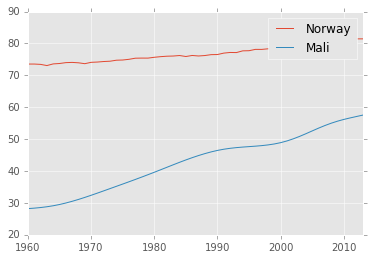

In [54]:
# compare life expectancy
# Norway had highest life expectancy in 1960
t['Norway'].plot()

# Mali had lowest life expectancy in 1960
t['Mali'].plot()

plt.legend();

In [55]:
print("Norway Percentage Gain = ", lexp_gain['Norway'])
print ("Mali Percentage Gain = ", lexp_gain['Mali'])

Norway Percentage Gain =  0.11
Mali Percentage Gain =  1.04


### visual representation of life expectancy during period 1960 - 2013

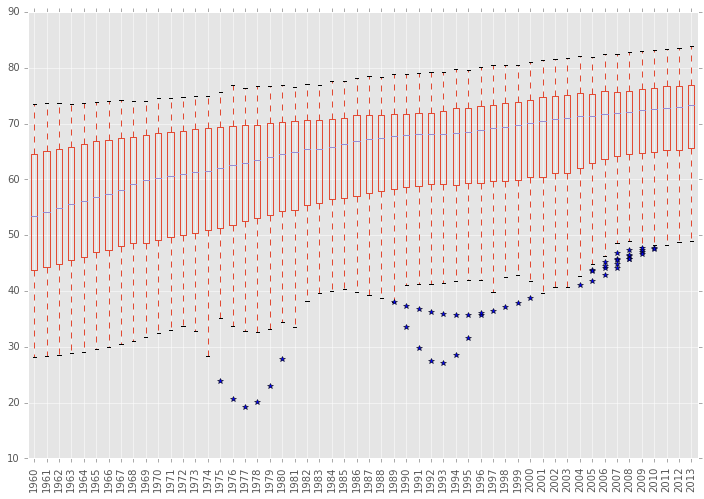

In [56]:
# bird's eye view of LE 
fig = plt.figure(figsize=LARGE_FIGSIZE)
lexp.boxplot(sym="*");
plt.xticks(rotation='vertical');

In [57]:
lexp['1977'].idxmin()

'Cambodia'

In [58]:
lexp['1993'].idxmin()

'Rwanda'

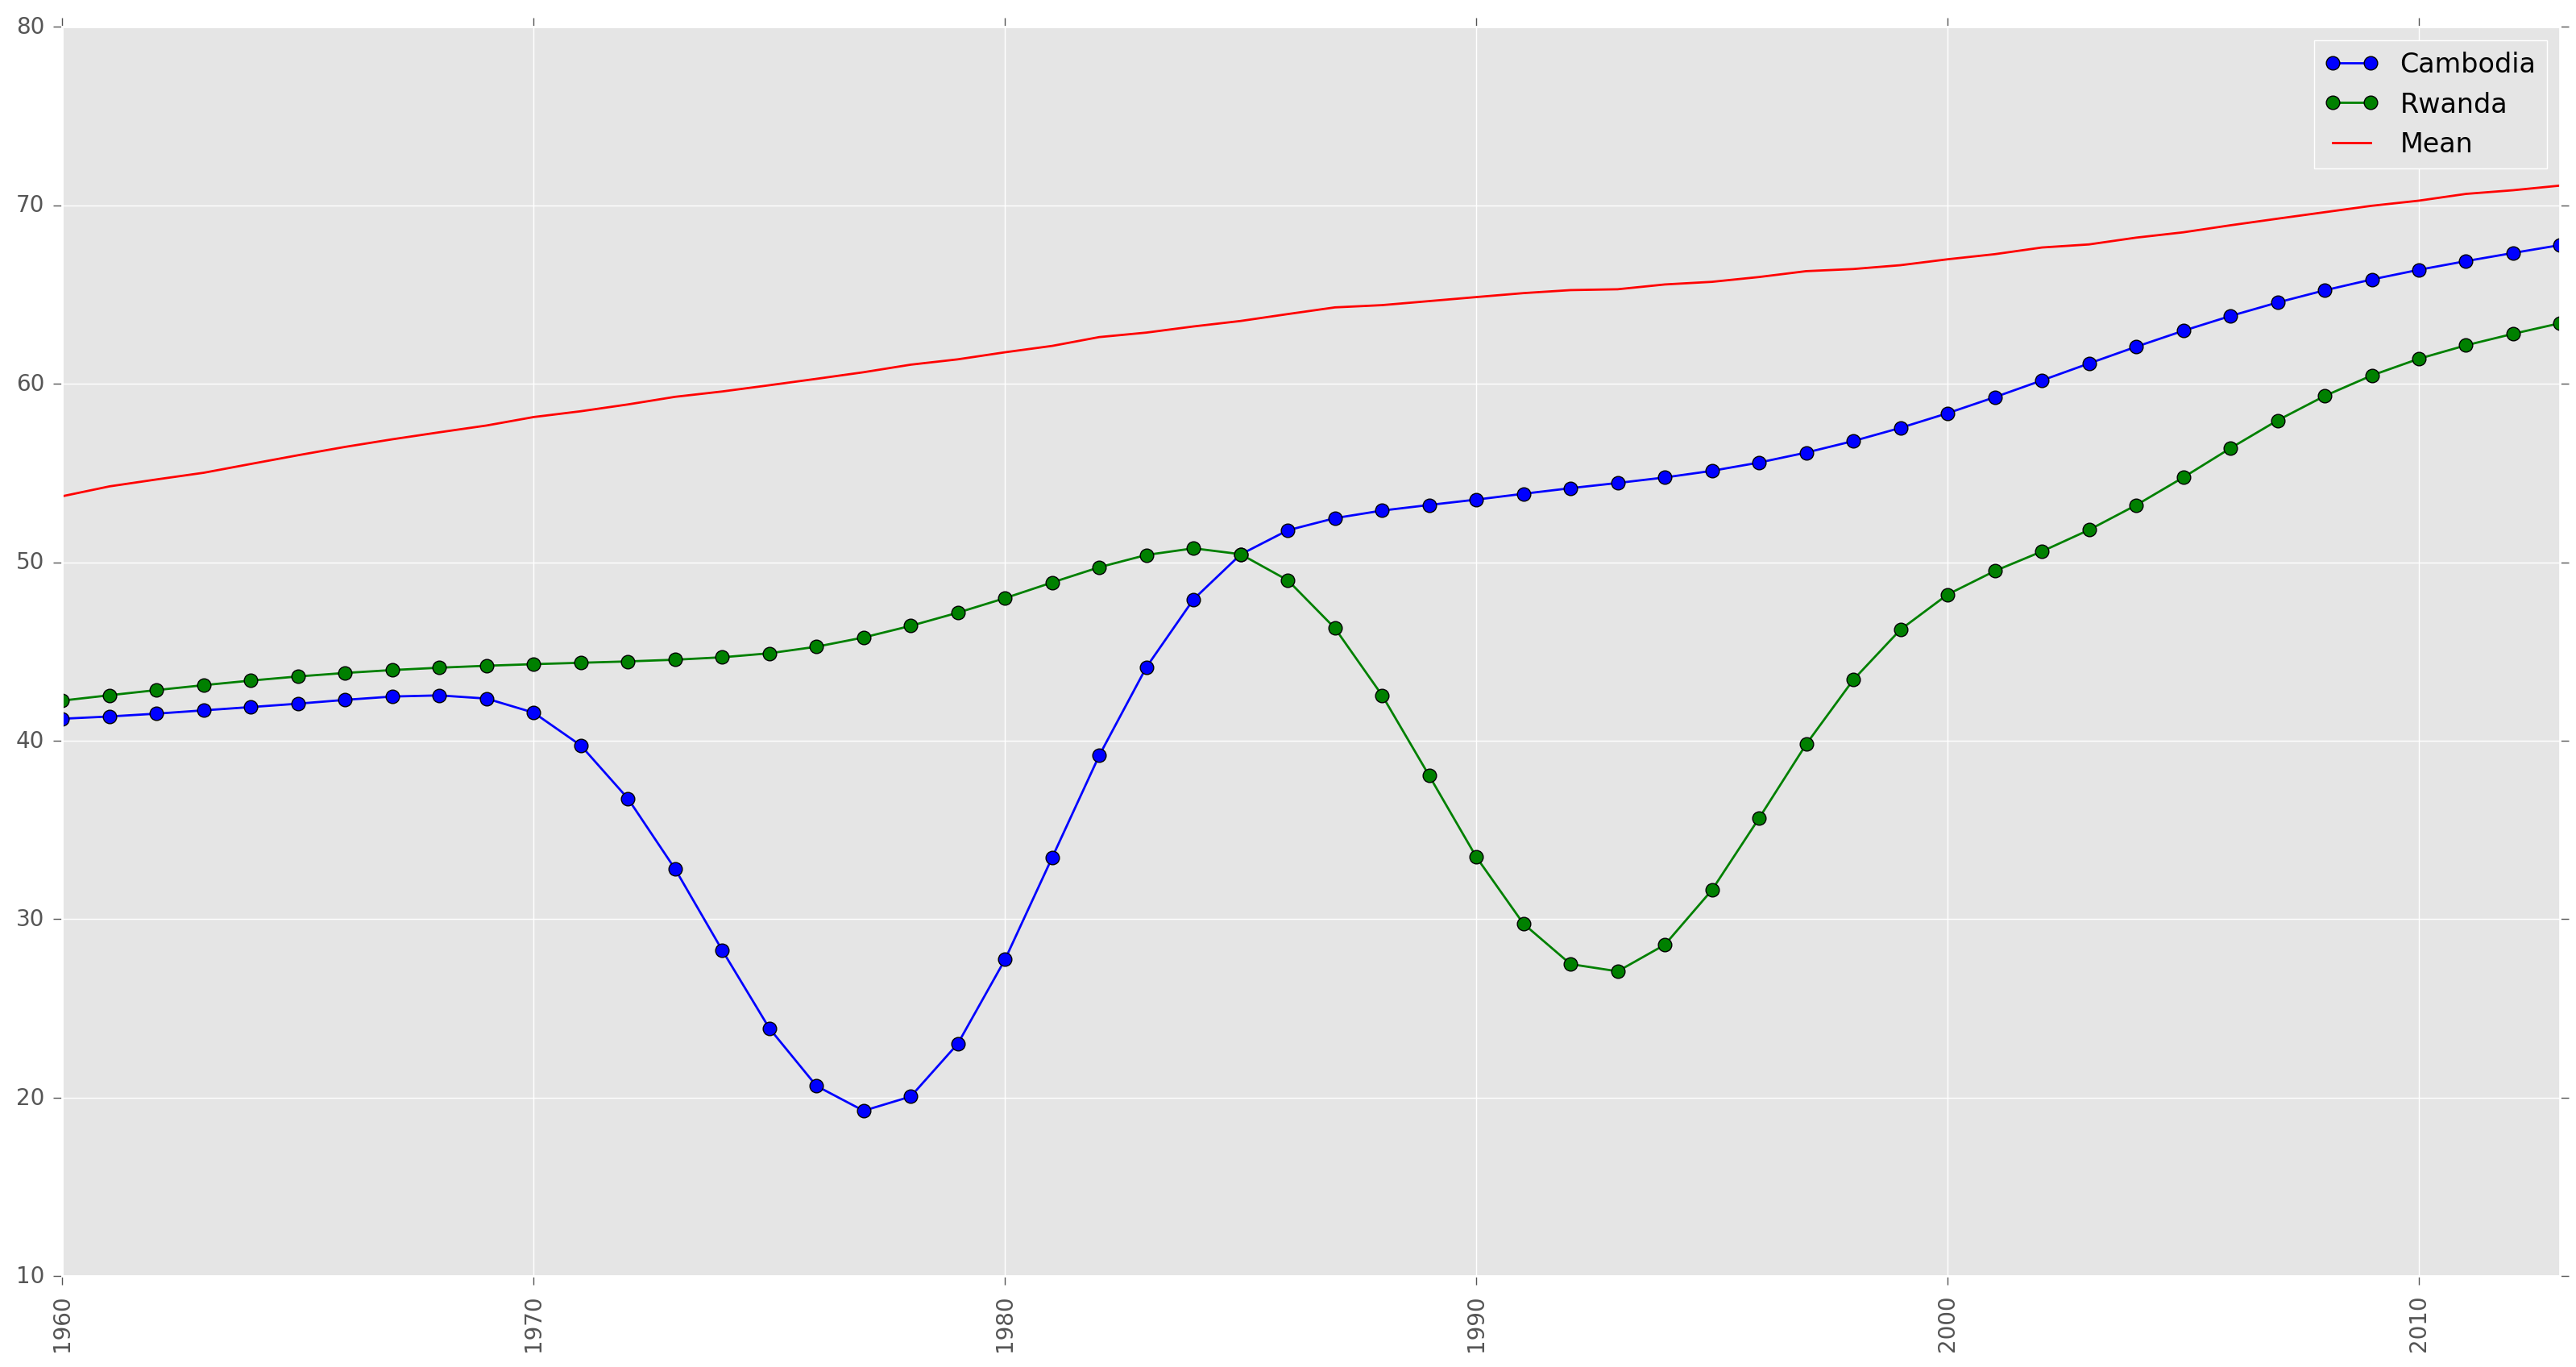

In [59]:
fig = plt.figure(figsize=(20,10), dpi=200)
t['Cambodia'].plot(marker='o', color='blue');
t['Rwanda'].plot(marker='o',color='green');
lexp.mean().plot(color='red', label='Mean');
plt.xticks(rotation='vertical');
plt.legend();

### compare sets of countries

In [60]:
# define function to compare a set of countries; the comparison prints gain percentage and plot of LE
def compare(countries):
    for country in countries:
        t[country].plot(figsize=(20,10))
        print(country, lexp_gain[country])
    plt.legend();

In [61]:
# create a list of the ten countries with lowest life expectancy in 1960
bot10 = lexp.sort_values(by='1960')['1960'].head(10).index.tolist()

In [62]:
# create a list of the ten countries with the highest life expectancy in 1960
top10 = lexp.sort_values(by='1960')['1960'].dropna().tail(10).index.tolist()

In [63]:
bot10

['Mali',
 'Sierra Leone',
 'South Sudan',
 'Gambia, The',
 'Afghanistan',
 'Bhutan',
 'Angola',
 'Timor-Leste',
 'Yemen, Rep.',
 'Burkina Faso']

Mali 1.04
Sierra Leone 0.66
South Sudan 0.74
Gambia, The 0.87
Afghanistan 0.86
Bhutan 1.14
Angola 0.57
Timor-Leste 1.0
Yemen, Rep. 0.85
Burkina Faso 0.69


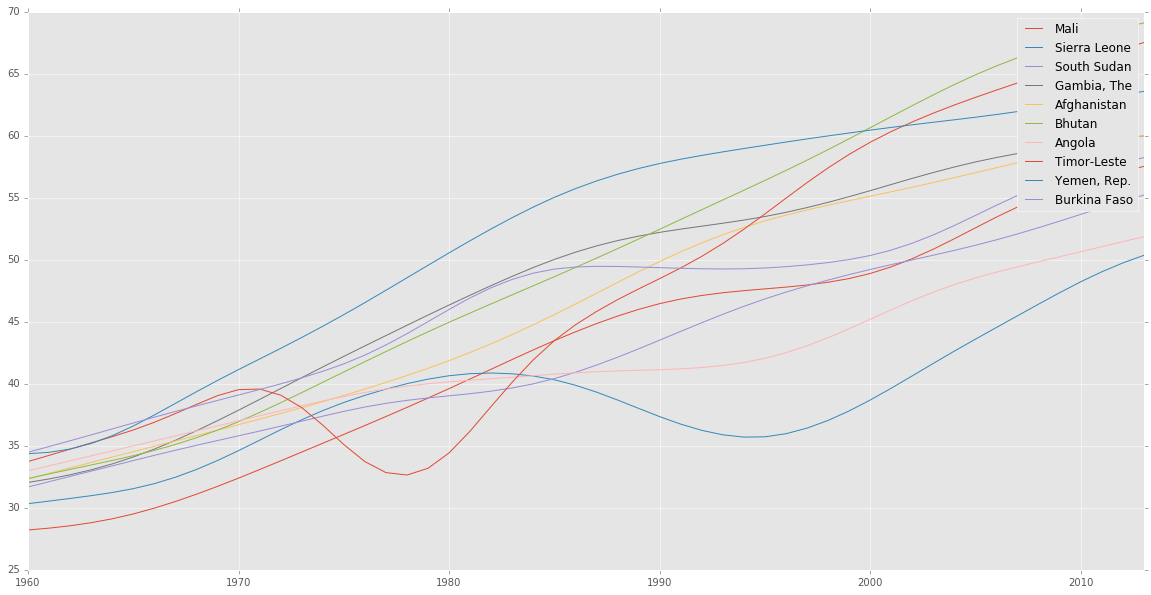

In [64]:
compare(bot10)

Australia 0.16
United Kingdom 0.14
Canada 0.14
New Zealand 0.14
Switzerland 0.16
Denmark 0.11
Sweden 0.12
Netherlands 0.11
Iceland 0.13
Norway 0.11


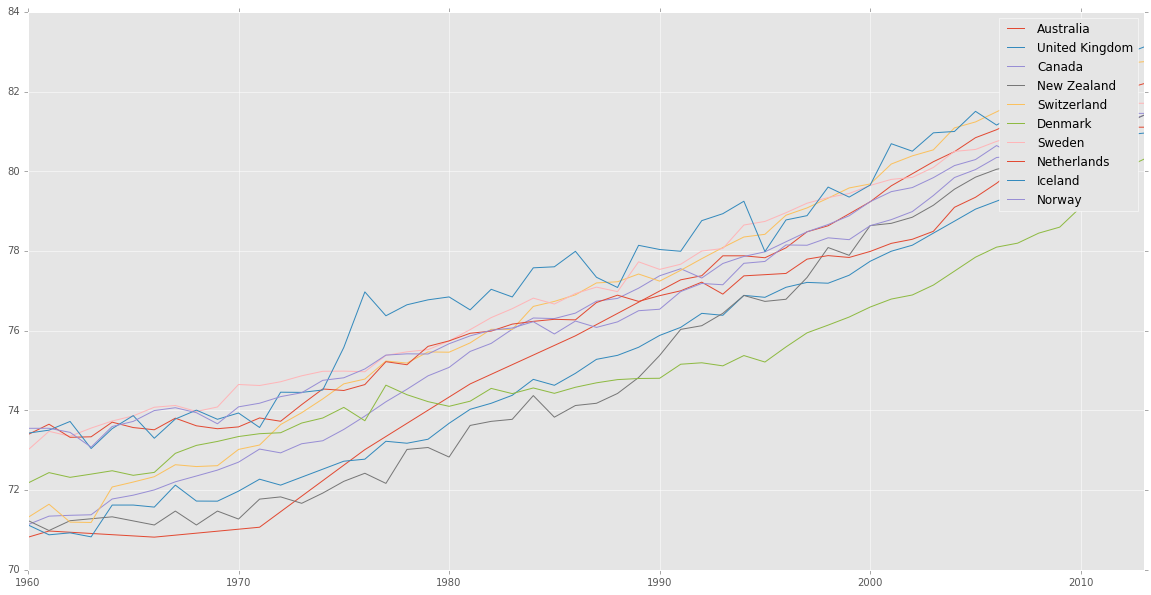

In [65]:
compare(top10)

In [66]:
sub_sahara=['Namibia','Botswana','South Africa','Uganda','Kenya']

Namibia 0.37
Botswana 0.27
South Africa 0.16
Uganda 0.31
Kenya 0.31


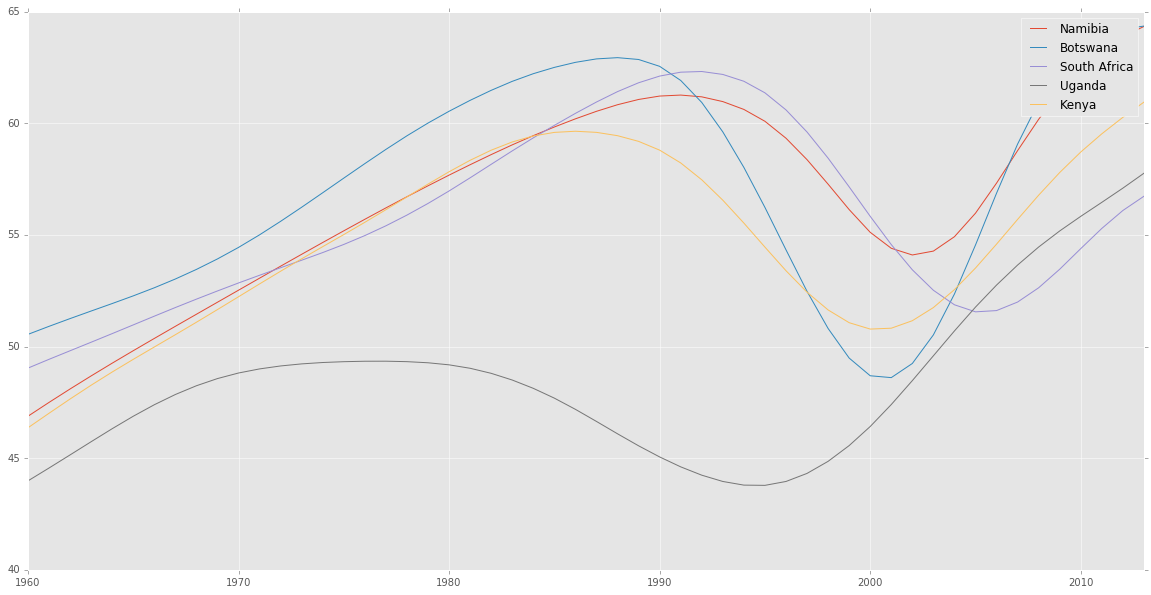

In [67]:
compare(sub_sahara)

In [68]:
latam = ['Argentina','Bolivia','Colombia','Chile','Brazil','Paraguay','Uruguay']

Argentina 0.17
Bolivia 0.61
Colombia 0.3
Chile 0.41
Brazil 0.37
Paraguay 0.14
Uruguay 0.13


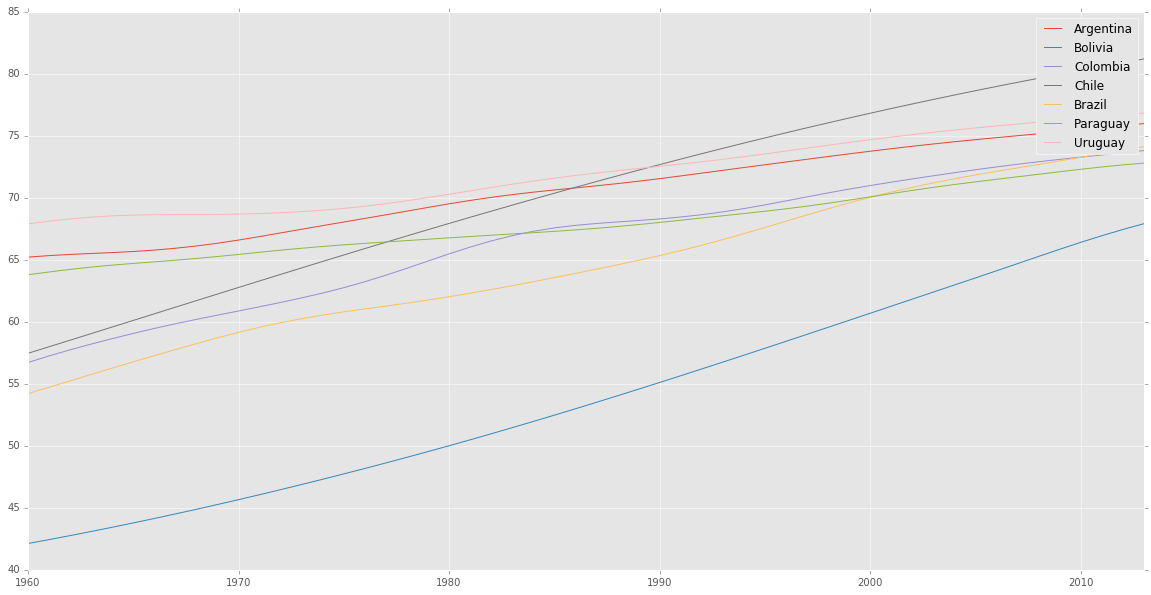

In [69]:
compare(latam)

In [70]:
africa = ['Nigeria','South Africa','Niger','Tanzania','Zambia']

Nigeria 0.41
South Africa 0.16
Niger 0.71
Tanzania 0.47
Zambia 0.31


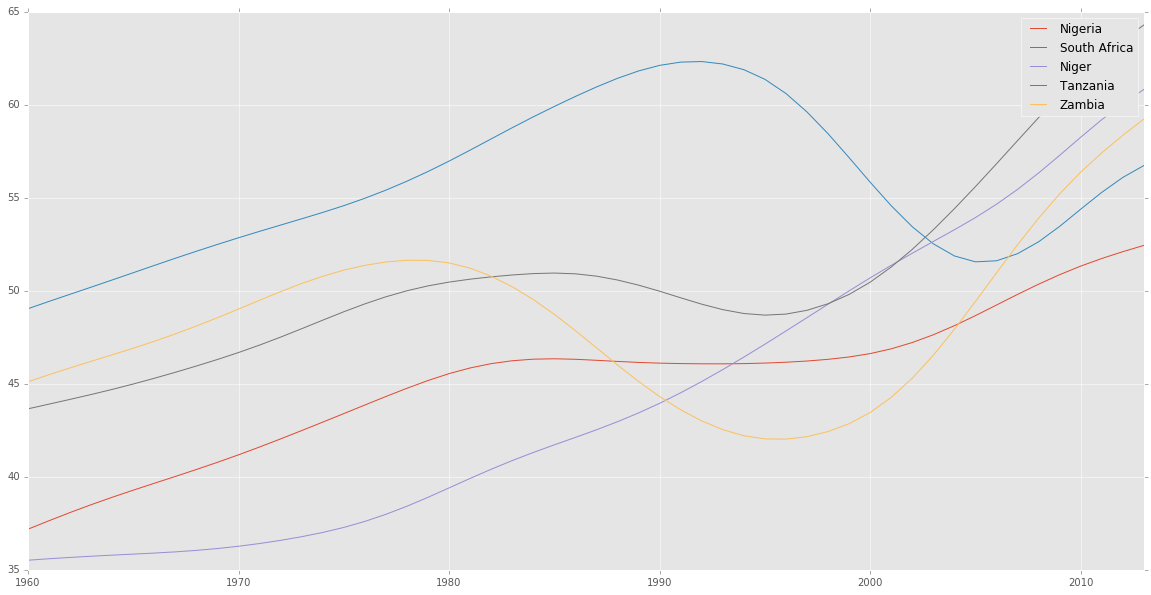

In [71]:
compare(africa)